<a href="https://colab.research.google.com/github/JUNGBORAM/jejumaster/blob/main/6%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5__OpenAPI(%EB%84%A4%EC%9D%B4%EB%B2%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 웹 데이터 분석

## 1. OpenAPI를 이용한 데이터 수집

**[주의!] (코랩)한글 폰트 지정하는 방법**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (47.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

### 한글 폰트 지정하기

In [1]:
import matplotlib.pyplot as plt
#(Mac한글 폰트 지정하기)
plt.rcParams['font.family'] = 'NanumBarunGothic'

#(windows)한글 폰트 지정하기
# plt.rcParams['font.family'] = 'Malgun Gothic'

---

### 01.웹 크롤링의 이해
- **웹 크롤링(Web Crawling)**: 웹 페이지로부터 원하는 정보를 추출하는 기법, 보통 여러 페이지 탐색하는 방법,
- **웹 스크래핑(Web Scraping)**: 특정한 하나의 웹 페이지를 탐색하는 방법
- **웹 크롤링과 웹 스크래핑의  방법이 동일하여 보통 웹 크롤링이라고 통칭해서 부른다.**

In [6]:
# 웹요청 동작 원리
import requests

requests.get("https://google.com")
# 정상적으로 실행이 되면 코드 200이 응답(Response)

<Response [200]>

In [10]:
import requests

response = requests.get("https://google.com")

# 응답 상태
print('#응답 상태: ', response.status_code)

# # 응답 바이너리 원문
# print('#응답 바이너리 원문: ', response.content)

# # 응답 UTF-8로 인코딩된 문자열
# print('#응답 UTF-8로 인코딩된 문자열: ', response.text)

# 응답 헤더
print('#응답 헤더: ', response.headers)

# # 응답 헤더: 콘텐트 유형
# print('#응답 헤더유형: ', response.headers['Content-Type'])

#응답 상태:  200
#응답 헤더:  {'Date': 'Wed, 01 Nov 2023 02:21:42 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-WGehRhc7C6XGEpnS5H014A' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': 'SOCS=CAAaBgiAqoaqBg; expires=Sat, 30-Nov-2024 02:21:42 GMT; path=/; domain=.google.com; Secure; SameSite=lax, AEC=Ackid1QXsZ8Ror1H7abw65WqxuNiftgjSG2VNVHYASc1LeRQhN1LEvweCTs; expires=Mon, 29-Apr-2024 02:21:42 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, __Secure-ENID=15.SE=APhakcNPECKdgJRNZR4zWpNtVBRiqcsHQHlxxcGwMfbnePHcLBajAkrbgA1k3mdISoVX_kA1rdYv8WiXK0qsvyVSYHbMPnRO4

---------------------

## 02.네이버 OpenAPI 사용하기

In [12]:
import urllib.request
import json
# 네이버 애플리케이션 등록 정보
client_id = 'VTXV27ORy5WzUYW64mbC'  # 자신의 client_id
client_pw = 'E7lpy3Eh9v'            # 자신의 client_secret

# 검색어 입력
title = input("검색 도서명: ")
# url설정
url = "https://openapi.naver.com/v1/search/book.json"
query = "?query="+urllib.parse.quote(title)
option = "&display=10&start=1" # 10개씩&가져올 페이지 지정
url_query = url + query + option
print(f'url_query = {url_query}')

#Open API 검색 요청 개체 설정
request = urllib.request.Request(url_query)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_pw)

# 검색 요청 및 처리
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode == 200):
    result = response.read().decode('utf-8')
else:
    print("검색에 실패하였습니다.")
    exit()
# 검색 결과 parsing 해서 보기좋게 출력하기
books = json.loads(result) #검색 결과를 json타입으로 보여주기
if books == None:
    print("json.loads 실패하였습니다.")
    exit()

# books 결과 중 도서 정보가 담긴 items 항목의 내용을 parsing한다.
for book in books['items']:
    print(f"제목: {book['title']}")
    print(f"저자: {book['author']}")
    print(f"URL: {book['link']}")
    print()

검색 도서명: 간편요리
url_query = https://openapi.naver.com/v1/search/book.json?query=%EA%B0%84%ED%8E%B8%EC%9A%94%EB%A6%AC&display=10&start=1
제목: 후다닥 간편요리
저자: 주부생활 편집부
URL: https://search.shopping.naver.com/book/catalog/32441024855

제목: 후다닥 쌤의 후다닥 간편 요리 (후다닥의 쉽고 맛있는 집밥 레시피 103)
저자: 김연정
URL: https://search.shopping.naver.com/book/catalog/32444883982

제목: 간편 일품요리 (다양하게 즐기는 72가지 생활 요리)
저자: 김미란
URL: https://search.shopping.naver.com/book/catalog/32510361965

제목: 세상 편한 집밥 (박미란 고수에게 배우는 가정간편식 응용요리)
저자: 박미란
URL: https://search.shopping.naver.com/book/catalog/32436088649

제목: 15분이면 뚝딱! 와인 안주 요리 (편의점, 배달 음식, 간편식을 활용한 와인 100배 즐기기)
저자: 최주리
URL: https://search.shopping.naver.com/book/catalog/32466663728

제목: 진짜 캠핑 요리 (버너 하나로 간편하게 만드는 베스트 캠핑 레시피 140)
저자: 이미경
URL: https://search.shopping.naver.com/book/catalog/32438164718

제목: 끼니 (싱글족을 위한 간편 밥상)
저자: 박용일
URL: https://search.shopping.naver.com/book/catalog/32466668998

제목: 한식양념장 (한식양념장으로 간편하게 조리하기)
저자: 
URL: https://search.shopping.naver.com/book/catalog/32455

### # 1.네이버 OpenAPI 신청하기 : 네이버 **검색(책, 뉴스, 쇼핑)

- 네이버 OpenAPI 소개: https://developers.naver.com/products/intro/plan/
- 개발 가이드 보기: https://developers.naver.com/docs/serviceapi/search/news
- OpenAPI 신청하기: https://developers.naver.com/apps/#/register

### # 2.네이버 OpenAPI 사용 예 : 책 검색

### [실습] : 네이버 검색 API 사용하여 데이터 수집하기

#### 라이브러리 설치하기

In [2]:
# 정적 크롤링을 위한 requests 설치
!pip install requests

In [18]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

now = datetime.datetime.now()
datas = []   #csv파일을 위한 변수

client_id = 'VTXV27ORy5WzUYW64mbC'  # 자신의 client_id
client_pw = 'E7lpy3Eh9v'            # 자신의 client_secret
PATH = './sample_data'              # 수집 데이터 저장 폴더


#[CODE 1]
def get_RequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            return response.read().decode('utf-8')

    except Exception as e:
#         if response.getcode() == 400 and datas:
#             return None
        print(e)
        print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Error for URL : {url}" )
        return None


#[CODE 2]  네이버 검색 API
def get_NaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    print(f'{url}:url')
    responseDecode = get_RequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def get_PostData(node, post, jsonResult, cnt):
    if node == 'book':
        data = {'제목':post['title'],
                '저자':post['author'],
                '출판사':post['publisher'],
                '출간일':post['pubdate'],
                '링크':post['link'],
                '이미지':post['image']}
    elif node == 'news':
        data = {'제목':post['title'],
                '링크':post['originallink'],
                '내용':post['description']}
    elif node == 'shop':
        data = {'제목':post['title'],
                '브랜드':post['brand'],
                '제조사':post['maker'],
                '가격':post['lprice'],
                '이미지':post['image']}

    jsonResult.append(data)
    datas.append(data)

    return

#[CODE 0]
def main():
    global node, srcText

    nodeType = '''-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------'''
    print(nodeType)
    node = input('번호를 선택하세요.')
    if node == '1': node = 'book'
    elif node == '2': node = 'news'
    elif node == '3': node = 'shop'

    srcText = input(f'[{node} 분류에서] 검색할 키워드를 입력하세요: ')

    display, cnt = 100, 0
    jsonResult = []
    jsonResponse = get_NaverSearch(node, srcText, 1, display)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            get_PostData(node, post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = get_NaverSearch(node, srcText, start, total)
#     print(f'가져올 데이터 : {total} 건')

    with open(f'{PATH}/naver_{node}_{srcText}', 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))



    # csv 파일로 저장하기
    file = f'{PATH}/naver_{node}_{srcText}.csv'
    df = pd.DataFrame(datas)
    df.to_csv(file, index=False, encoding="utf-8-sig")
    print(f'{PATH}/naver_{node}_{srcText}.csv SAVED')
    return df

#-----------
# 시작
#-----------
df = main()
df

-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------
번호를 선택하세요.2
[news 분류에서] 검색할 키워드를 입력하세요: 이스라엘 전쟁
https://openapi.naver.com/v1/search/news.json?query=%EC%9D%B4%EC%8A%A4%EB%9D%BC%EC%97%98%20%EC%A0%84%EC%9F%81&start=1&display=100:url
[2023년11월01일 02시44분58초] Url Request Success
https://openapi.naver.com/v1/search/news.json?query=%EC%9D%B4%EC%8A%A4%EB%9D%BC%EC%97%98%20%EC%A0%84%EC%9F%81&start=101&display=87613:url
HTTP Error 400: Bad Request
[2023년11월01일 02시44분58초] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EC%9D%B4%EC%8A%A4%EB%9D%BC%EC%97%98%20%EC%A0%84%EC%9F%81&start=101&display=87613
가져온 데이터 : 100 건
./sample_data/naver_news_이스라엘 전쟁.csv SAVED


,제목,링크,내용
0,<b>이스라엘</b> 또 백리탄 투하했나...이번엔 레바논 타격,https://www.munhwa.com/news/view.html?no=20231...,"전투에 참여하지 않는 이들을 해치면 의도, 심각성에 따라 <b>전쟁</b>범죄 혐의..."
1,"김태흠, 독일서 '박정희·이건희 정신' 언급..&quot;준비된 충남&quot;",http://www.dtnews24.com/news/articleView.html?...,"미중 패권 경쟁과 우크라이나 <b>전쟁</b>, <b>이스라엘</b>-하마스 분쟁 ..."
2,전방위 위기 넘을 ‘정치 대혁신’ 절실하다[사설],https://www.munhwa.com/news/view.html?no=20231...,"우크라이나 <b>전쟁</b>이 2년째 계속되고, 하마스 테러에 대한 <b>이스라엘<..."
3,"국제 금값, 중동 불안에 지난달 8% 상승…3월 이후 최고",https://biz.sbs.co.kr/article_hub/20000142086?...,<b>이스라엘</b>과 하마스(팔레스타인 무장 정파) 간 <b>전쟁</b>에 따른 ...
4,"중동<b>전쟁</b>에 잊힐라… 우크라, 미 찾아 로비전",https://www.munhwa.com/news/view.html?no=20231...,com <b>이스라엘</b>·하마스 <b>전쟁</b> 발발과 미국 하원 지도부 변화...
...,...,...,...
95,"[10분 뉴스정복] 중앙·동아도 비판, &quot;메가시티? 무책임한 총선 득표 전...",https://www.ohmynews.com/NWS_Web/View/at_pg.as...,<b>이스라엘</b> 전투기가 요격했지만 악시오스는 &quot;<b>전쟁</b>이 ...
96,NYT &quot;<b>이스라엘</b>군 지상작전으로 인질 구출 어렵다&quot; ...,http://www.newsis.com/view/?id=NISX20231101_00...,<b>이스라엘</b>군 가자 시티 내부 진격 늦춰 하마스는 장기간 <b>전쟁</b>...
97,미 국무 또 <b>이스라엘</b> 방문...일시적 교전 중단 등 논의 주목,https://www.ytn.co.kr/_ln/0104_202311011021305821,블링컨 미 국무장관은 지난달 12일에도 <b>이스라엘</b>을 방문해 지원 방침을 ...
98,"유대인 색출? 파리 건물 곳곳에 그려진 ‘다윗의 별’ 낙서 60개, 무슨 일",https://www.chosun.com/international/internati...,한편 <b>이스라엘</b>과 팔레스타인 무장단체 하마스 <b>전쟁</b> 이후 프랑...




---



### [실습] :  네이버 Papago API 사용하여 번역하기

In [17]:
import os
import sys
import urllib.request
import datetime
import json


# client_id = 'VTXV27ORy5WzUYW64mbC'  # 자신의 파파고 NMT API ID
# client_pw = 'E7lpy3Eh9v'            # 자신의 파파고 NMT API PASSWORD

news = []   #csv파일을 위한 변수

#[CODE 1]
def papago(prompt, lang=1):

    encText = urllib.parse.quote(prompt)
    if lang == 1 :
        data = "source=ko&target=en&text=" + encText
    else:
        data = "source=en&target=ko&text=" + encText
    url = "https://openapi.naver.com/v1/papago/n2mt"

    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req, data=data.encode("utf-8") )
        if response.getcode() == 200:
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            responseDecode = response.read().decode('utf-8')

            if responseDecode == None:
                return None
            else:
                return json.loads(responseDecode)

    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

# 메인
lang= int(input('[선택] 1:한글->영어, 2:영어->한글: '))
txt =  '한글' if lang==1 else '영어'
# if lang == 1:
#     txt = '한글'
# else:
#     txt = '영어'

prompt= input(f'[번역] 변환할 문장을 입력하세요.[{txt}로 입력]: ')

jsonResponse = papago(prompt, lang)  # 파파고 번역
jsonResponse
print('-'*50)
print(f"[번역 결과] => {jsonResponse['message']['result']['translatedText']}")


KeyboardInterrupt: ignored

-------------------------

### 한글 텍스트 Cleansing

#### 라이브러리 설치

In [19]:
# 자연어처리 형태소 분석 및 토큰화
!pip install nltk

In [20]:
# (한글)자연어처리 형태소 분석 및 토큰화
# (WinOS에서는 konlpy를 사용하기 위해 JDK를 설치해야 오류가 없어 코랩에서 실행함)
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 42.8 MB/s eta 0:00:00


In [21]:
# html tag parsing을 위한 라이브러리
!pip install beautifulsoup4

#### 한글 테스트 자연어 처리(Text Cleansing)

In [23]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import konlpy
import nltk

def clean_korean_documents(documents):
    #텍스트 정제 (HTML 태그 제거)
    for i, document in enumerate(documents):
        document = BeautifulSoup(document, 'html.parser').text
        documents[i] = document

    #텍스트 정제 (특수기호 제거)
    for i, document in enumerate(documents):
        document = re.sub(r'[^ ㄱ-ㅣ가-힣]', '', document) #특수기호 제거, 정규 표현식
        documents[i] = document

    #텍스트 정제 (형태소 분석)
    for i, document in enumerate(documents):
        okt = konlpy.tag.Okt()
        clean_words = []
        for word in okt.pos(document, stem=True): #어간 추출
            if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
                clean_words.append(word[0])
        document = ' '.join(clean_words)
        documents[i] = document

    #텍스트 정제 (불용어 제거)
    df = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
    df[0] = df[0].apply(lambda x: x.strip())
    stopwords = df[0].to_numpy()
    nltk.download('punkt')
    for i, document in enumerate(documents):
        clean_words = []
        for word in nltk.tokenize.word_tokenize(document):
            if word not in stopwords: #불용어 제거
                clean_words.append(word)
        documents[i] = ' '.join(clean_words)

    return documents


def clean_target_feature(data):
    x_data = data.to_list()
    return clean_korean_documents(x_data)



# ---------------------
# 1.클린징할 파일 가져오기
file = f'{PATH}/naver_{node}_{srcText}.csv'
df = pd.read_csv(file)

# 2.클린징할 컬럼 선택해서 클린징하기
# (앞 OpenAPI검색에서 2.news 검색을 한 후 실행하기)
df['제목'] = clean_target_feature(df['제목'])  # 기사 제목
df['내용'] = clean_target_feature(df['내용'])  # 기사 내용

# 3.클린징 결과 csv 파일로 저장하기
file = f'{PATH}/naver_{node}_{srcText}_clean.csv'
df.to_csv(file, index=False, encoding="utf-8-sig")
print(f'{file} SAVED')
df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


./sample_data/naver_news_이스라엘 전쟁_clean.csv SAVED


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,제목,링크,내용
0,이스라엘 리 타다 투하 하다 이번 레바논 타격,https://www.munhwa.com/news/view.html?no=20231...,전투 참여 하다 않다 해치 의도 심각 따르다 전쟁범죄 혐의 있다 앞서 인권 단체 휴...
1,김태흠 독일 박정희 이건희 정신 언급 준비 되다 충남,http://www.dtnews24.com/news/articleView.html?...,밉다 패권 경쟁 우크라이나 전쟁 이스라엘 하마스 분쟁 세계 경제 여건 점점 어려워지...
2,방위 위기 넘다 정치 혁신 절실 하다 사설,https://www.munhwa.com/news/view.html?no=20231...,우크라이나 전쟁 계속 되다 하마스 테러 대한 이스라엘 대응 본격 화하다 중동 지역 ...
3,국제 금값 중동 불안 지난달 상승 이후 최고,https://biz.sbs.co.kr/article_hub/20000142086?...,이스라엘 하마스 팔레스타인 무장 정파 간 전쟁 따르다 안전 자산 선호 심리 강화 지...
4,중동전쟁 잊다 힐라 크다 밉다 찾다 로비 전,https://www.munhwa.com/news/view.html?no=20231...,이스라엘 하마스 전쟁 발발 미국 하원 도부 변화 미국 지원이 축소 중단 되다 우려 ...
...,...,...,...
95,분 뉴스 정복 중앙 동아 비판 메가시티 무책임하다 총선 득표 전략,https://www.ohmynews.com/NWS_Web/View/at_pg.as...,이스라엘 전투기 요격 하다 악 오스 전쟁 새롭다 전선 확산 하다 있다 우려 커지다 ...
96,이스라엘군 지상 작전 인질 구출 어렵다 이팔 전쟁,http://www.newsis.com/view/?id=NISX20231101_00...,이스라엘군 가다 시티 내부 진격 늦추다 하마스 장기간 전쟁 대비 하다 미로 같다 지...
97,밉다 국무 이스라엘 방문 일시 교전 중단 논의 주목,https://www.ytn.co.kr/_ln/0104_202311011021305821,블 링컨 밉다 국무장관 지난달 이스라엘 방문 하다 지원 방침 밝히다 이다 요르단 카...
98,유대인 색출 파리 건물 곳곳 그려지다 다윗 별 낙서 무슨,https://www.chosun.com/international/internati...,한편 이스라엘 팔레스타인 무장 단체 하마스 전쟁 이후 프랑스 유대 주의 움직임 기승...


### 텍스트 빈도수로 워드 클라우드 만들기

- **사이킷런 CountVectorizer클래스 사용 : 단어 빈도수 추출**
- **단, 한글에서 불용어 처리 및 가중치 처리 등 자연어 텍스트 전처리에 필요한 여러 가지 방법은 여기서 다루지 않는다.**

#### 라이브러리 설치

In [24]:
!pip install scikit-learn

#### 기사 제목을 토큰화 하고 빈도수 출력하기

[('이스라엘', 33), ('전쟁', 20), ('가자지구', 13), ('이팔', 12), ('하마스', 11), ('하다', 9), ('돼다', 6), ('바이든', 6), ('난민', 5), ('투자', 5)]


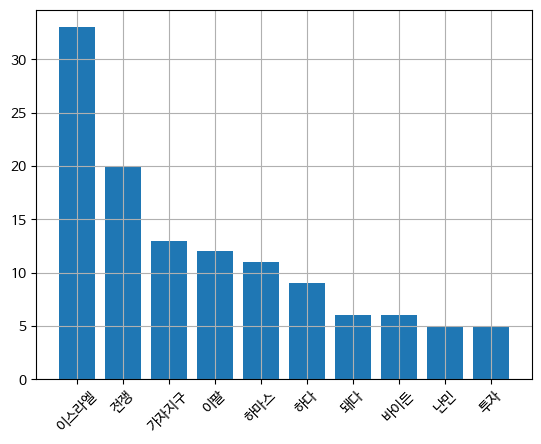

<Figure size 640x480 with 0 Axes>

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # 기사제목을 토큰화
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'{PATH}/{srcText}_bar_graph.png')


# 기사제목을 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(df['제목'].to_list())

# 단어(토큰) 빈도 수_Bar그래프 그리기 : 상위 10개
draw_wordTokenCountGraph(feature_name[:10], count[:10])

#### 워드 클라우드로 만들기

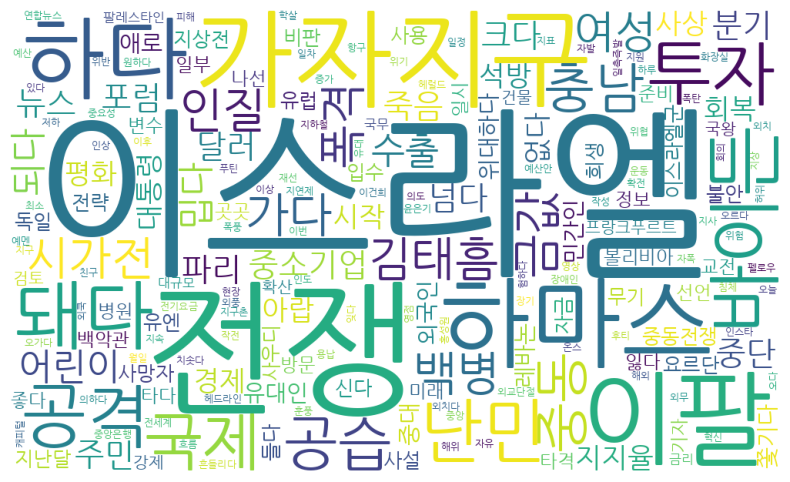

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 한글 폰트 경로를 설정
font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  (#코랩)
# font_path = 'malgun'  # C:/Windows/Fonts/   #(window에서)
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# (토큰명, 빈도수) 딕셔너리 타입으로 변환
data = dict(zip(feature_name, count))

# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file(f'{PATH}/{srcText}_워드클라우드.png')



---



## 03.웹 이미지 수집하기

### # 1. 웹 이미지 화면에 출력하기

In [27]:
from IPython.display import Image
Image(url='https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg')

### # 2.  웹 이미지 파일로 저장하기

In [28]:
import requests
from io import BytesIO
from PIL import Image

# 다운받을 이미지 url
urls = [
    "https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg",
    "https://shopping-phinf.pstatic.net/main_3726611/37266116619.20230119071117.jpg"
]
# 파일로 저장하기
for idx, url in enumerate(urls):
    res = requests.get(url)                   # url 요청
    img = Image.open(BytesIO(res.content))    # 응답결과(res.content)바이트파일 이미지 파일로 오픈
    img.save(f'./testimg_{idx}.png', 'png')   # 'png'이미지로(만) 저장

### [실습] : 웹 이미지 수집하기
- 앞에서 저장한 쇼핑 목록에 있는 URL을 이용하여 이미지 저장하기

In [29]:
# 이미지 다운로드 하기
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import time
import os

FILE = f'{PATH}/naver_shop_가을니트.csv'  # 앞에서 자신이 검색한 쇼핑 파일
ImgFolder = f'{PATH}/download/'         # 다운받을 이미지 폴더
MAX = 10                                # 이미지 파일 다운로드 건수

def getImageUrl(file):
    print(f'읽은 파일명: {file}')
    df = pd.read_csv(file, encoding='utf-8') # 이미지가 있는 쇼핑 파일 불러오기
    return df['이미지'].to_list()

def createDirectory(directory): # 다운받을 이미지 폴더 만들기
    try:
        if not os.path.exists(directory):
            print(f'{directory} 폴더가 생성되었습니다.')
            os.makedirs(directory)
        print(f'이미지 폴더 위치 : {directory}')
    except OSError:
        print("Error: Failed to create the directory.")

def downloadImageFile(urls, imgfolder):
    start = time.time()             # 이미지 다운로드 속도 time check
    for idx, url in enumerate(urls):
        if idx == MAX:
            break  # MAX 건수만 처리하기
        res = requests.get(url)     # request.get 요청
#         print(f'[{idx+1:2>}][{time.time() - start}] : {url}')  # 이미지 다운로드 시간 체크
        print(f'[{idx+1:0>2}] : {url}')  # 이미지 다운로드 시간 체크
        img = Image.open(BytesIO(res.content))  #Img open
        img.save(f'{imgfolder}testimage_{idx}.png', 'png')
    return idx


urls = getImageUrl(FILE)                # 이미지 URL 목록 가져오기
createDirectory(ImgFolder)              # 다운받을 이미지 폴더 만들기
totalcnt = downloadImageFile(urls, ImgFolder)      # 이미지 다운로드하기
print(f'총 다운로드 건수: {totalcnt}')


읽은 파일명: ./sample_data/naver_shop_가을니트.csv
./sample_data/download/ 폴더가 생성되었습니다.
이미지 폴더 위치 : ./sample_data/download/
[01] : https://shopping-phinf.pstatic.net/main_8201676/82016764964.15.jpg
[02] : https://shopping-phinf.pstatic.net/main_8141365/81413654711.jpg
[03] : https://shopping-phinf.pstatic.net/main_8110549/81105494642.jpg
[04] : https://shopping-phinf.pstatic.net/main_3574104/35741041567.20230125234708.jpg
[05] : https://shopping-phinf.pstatic.net/main_8515883/85158836365.jpg
[06] : https://shopping-phinf.pstatic.net/main_8227052/82270521487.3.jpg
[07] : https://shopping-phinf.pstatic.net/main_8223769/82237690733.jpg
[08] : https://shopping-phinf.pstatic.net/main_8339525/83395253385.5.jpg
[09] : https://shopping-phinf.pstatic.net/main_3947443/39474430403.20231025031258.jpg
[10] : https://shopping-phinf.pstatic.net/main_8201675/82016750293.1.jpg
총 다운로드 건수: 10


---------------------------

끝!